<a href="https://colab.research.google.com/github/julianencisoizquierdo/ML_Python_digit_recognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist

# https://medium.com/artificialis/get-started-with-computer-vision-by-building-a-digit-recognition-model-with-tensorflow-b2216823b90a

df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle Projects/train_dr.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle Projects/test_dr.csv")

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# The load_data() method of the mnist module returns the train and test sets in form of nested tuples, which we have destructured
# in the above lines into X_train, X_test, y_train, and y_test.

print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")

print("Train Data sample")
print(df_train.head())
print("Shape of the train data file {}".format(df_train.shape))
print("Shape of the train data file {}".format(df_test.shape))

df_train = np.array(df_train, dtype="float32")
test_data = np.array(df_test, dtype="float32")
print("Shape of the train data {}".format(df_train.shape))
print("Shape of the train data {}".format(df_test.shape))

We have 60000 images in the training set and 10000 images in the test set.
Train Data sample
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0      

(60000, 28, 28, 1)

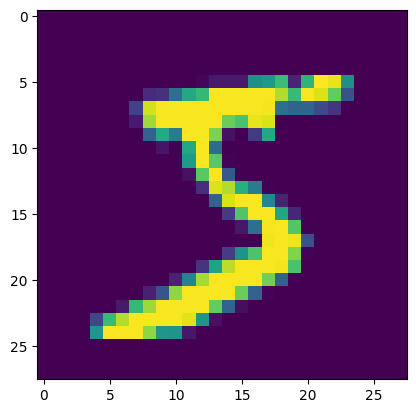

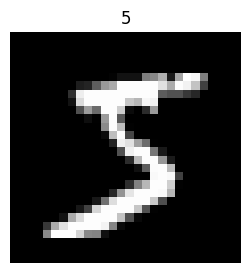

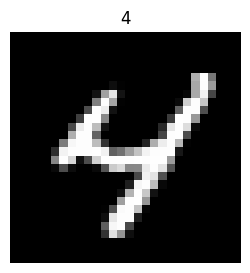

In [18]:
import matplotlib.pyplot as plt
import random

plt.imshow(X_train[0])

plt.figure(figsize=(3, 3))
plt.imshow(X_train[0], cmap="gray")
plt.title(y_train[0])
plt.axis(False);


random_image = random.randint(0,  len(X_train))

plt.figure(figsize=(3, 3))
plt.imshow(X_train[random_image], cmap="gray")

plt.title(y_train[random_image])
plt.axis(False);


X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1, ))


X_train = X_train / 255.
X_test = X_test / 255.


X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)



X_train.shape

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
	layers.Conv2D(filters=10,
				kernel_size=3,
				activation="relu",
				input_shape=(28,  28,  1)),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Conv2D(10,  3, activation="relu"),
	layers.Conv2D(10,  3, activation="relu"),
	layers.MaxPool2D(),
	layers.Flatten(),
	layers.Dense(10, activation="softmax")
])

In [20]:
# https://poloclub.github.io/cnn-explainer/

model.compile(loss="sparse_categorical_crossentropy",
			optimizer=tf.keras.optimizers.Adam(),
			metrics=["accuracy"])

In [ ]:
# https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627


input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)




In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss